In [5]:
import hydra
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
from omegaconf import OmegaConf
from jaxman.env.pick_and_delivery.env import JaxPandDEnv
from jaxman.utils import compute_agent_action
from jaxman.env.pick_and_delivery.core import TaskInfo, TrialInfo, State, AgentState
from jaxman.utils import compute_agent_action
config = hydra.utils.instantiate(OmegaConf.load("../scripts/config/env/pick_and_delivery/grid.yaml"))
config.level=0
config.map_size=10
config.num_agents=1
config.num_items=4
config.dist_reward=0
env = JaxPandDEnv(config)
# plt.imshow(env.render())
key = jax.random.PRNGKey(0)

In [3]:
ACTION_DICT = {
    "STAY": 0,
    "RIGHT": 1,
    "LEFT": 2,
    "DOWN": 3,
    "UP": 4,
    "LOAD": 5,
    "UNLOAD": 5,
}

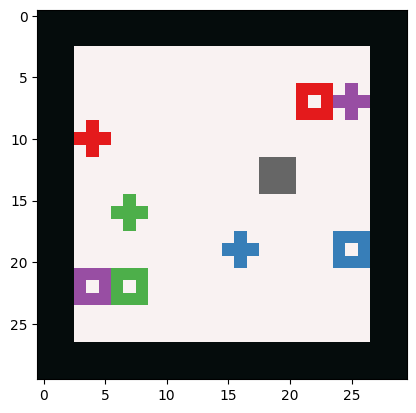

In [4]:
plt.imshow(env.render())

rew:[0.], act:[1], done:[ True]
item info:[[[    1    -1     7    -2]
  [    5     2     8     2]
  [    2     1     2     3]
  [30000 29996     1     3]]], goal:[[1 7]], hold:[[1]], mask:[[ True False  True False]]


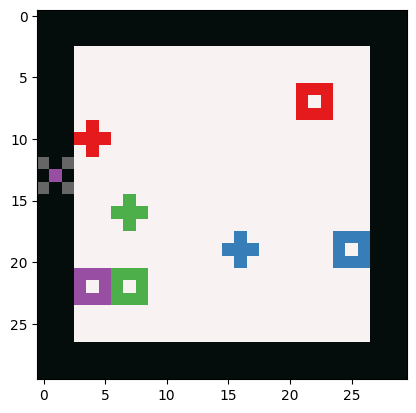

In [19]:
# actions = jax.random.choice(subkey, 6, (config.num_agents,))


rew:[0.], act:[3], done:[False]
rew:[0.], act:[0], done:[False]
rew:[-0.5], act:[2], done:[ True]
rew:[0.], act:[2], done:[ True]
rew:[0.], act:[4], done:[ True]
rew:[0.], act:[4], done:[ True]
rew:[0.], act:[1], done:[ True]
rew:[0.], act:[5], done:[ True]
rew:[0.], act:[0], done:[ True]
rew:[0.], act:[4], done:[ True]


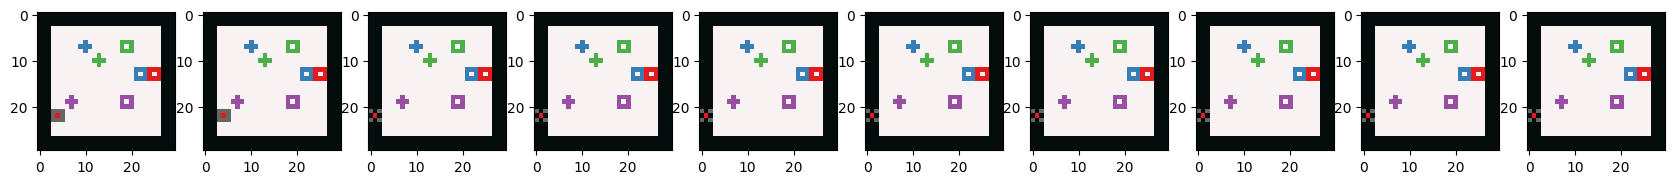

In [20]:
key, subkey = jax.random.split(key)
obs = env.reset(subkey)

is_item_loaded = jnp.expand_dims(jnp.arange(env.num_items) < env.num_agents, -1)
item_starts = (env.task_info.item_starts + is_item_loaded * 10000).astype(int)
env.state = env.state._replace(load_item_id=jnp.arange(env.num_agents), item_pos = item_starts)
fig, axes = plt.subplots(1, 10, figsize=(21, 3))
for i in range(10):
    key, subkey = jax.random.split(key)
    actions = jax.random.choice(subkey, 6, (config.num_agents,))
    # actions = compute_agent_action(["RIGHT","LEFT"])
    obs, rew, done, trial_info = env.step(actions)
    print(f"rew:{rew}, act:{actions}, done:{done}")
    axes[i].imshow(env.render())

# _observe(state, task_info, trial_info)

In [38]:
env.reset()

AgentObservation(agent_state=AgentState(pos=DeviceArray([[5, 7]], dtype=int32), rot=DeviceArray([[0.]], dtype=float32), vel=DeviceArray([[0]], dtype=int32), ang=DeviceArray([[0]], dtype=int32)), obs_scans=DeviceArray([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
              1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
              0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
              0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
              1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
              1., 1., 1., 1., 0., 0.]], dtype=float32), is_hold_item=DeviceArray([[0]], dtype=int32), relative_positions=DeviceArray([[[0, 0]]], dtype=int32), intentions=DeviceArray([[[0, 0]]], dtype=int32), item_info=DeviceArray([[[ 1, -2, -3, -4],
              [-1, -5, -3,  0],
              [ 3, -1,  2,  0],
              [-2, -3,  2, -3]]], dtype=int32), masks=DeviceArray([[False]], dtype=bool), item_masks=DeviceArra

rew:[3.], act:[5], done:[ True]
item info:[[[10000  9995     0    -5]
  [10000  9999     0    -1]
  [10005  9999     5    -1]
  [10005  9996     5    -4]]], goal:[[0 0]], hold:[[0]], mask:[[False False False False]]


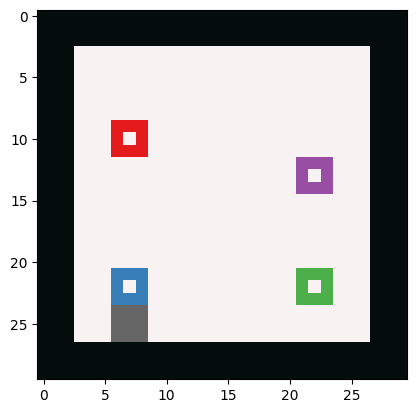

In [78]:

actions = compute_agent_action(["LOAD"])
# actions = compute_agent_action([LOAD"RIGHT","LEFT"])
obs, rew, done, trial_info = env.step(actions)
print(f"rew:{rew}, act:{actions}, done:{done}")
print(f"item info:{obs.item_info}, goal:{obs.item_goals}, hold:{obs.is_hold_item}, mask:{obs.item_masks}")
plt.imshow(env.render())